# Rechunk using Cubed

In [1]:
import cubed
import xarray as xr

In [2]:
import icechunk
from icechunk import IcechunkStore, StorageConfig, StoreConfig, VirtualRefConfig
storage = StorageConfig.filesystem(str('combined'))
store = IcechunkStore.open_existing(storage=storage)

In [3]:
import cubed


In [4]:
import zarr
group = zarr.open_group(store)
list(group)

['time', 'lat', 'lon', 'air']

In [5]:
dict(group.attrs)

{'Conventions': 'COARDS',
 'description': 'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.',
 'platform': 'Model',
 'references': 'http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html',
 'title': '4x daily NMC reanalysis (1948)'}

In [6]:
group['air'].info

Type               : Array
Zarr format        : 3
Data type          : DataType.int16
Shape              : (2920, 25, 53)
Chunk shape        : (730, 13, 27)
Order              : C
Read-only          : False
Store type         : IcechunkStore
Codecs             : [{'endian': <Endian.little: 'little'>}]
No. bytes          : 7738000 (7.4M)

In [16]:
ds = xr.open_zarr(
    store,
    zarr_version=3,
    consolidated=False,
    chunked_array_type='cubed',
    from_array_kwargs={'spec': cubed.Spec(allowed_mem="2GB", executor_name="single-threaded")},
    chunks={}
)

# ds = xr.open_dataset(
#     store,
#     engine="zarr",
#     backend_kwargs=dict(
#         zarr_version=3,
#         consolidated=False,
#     ),
#     chunked_array_type='cubed',
#     chunks={}
# )
ds

/var/folders/8t/gslp67x10vgfjgv68qj92n0m0000gn/T/ipykernel_97498/1165034817.py:1: FutureWarning: zarr_version is deprecated, use zarr_format
  ds = xr.open_zarr(


<xarray.Dataset> Size: 31MB
Dimensions:  (lon: 53, lat: 25, time: 2920)
Coordinates:
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB cubed.Array<chunksize=(730, 13, 27)>
Attributes:
    Conventions:  COARDS
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...
    title:        4x daily NMC reanalysis (1948)

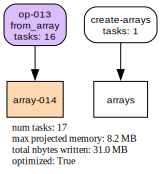

In [17]:
ds["air"].data.visualize()

In [18]:
ds = ds.chunk({"time": 2920, "lat": 5, "lon":5}, chunked_array_type='cubed')

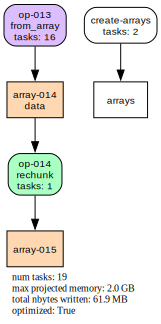

In [19]:
ds["air"].data.visualize()

In [20]:
import cubed
cubed.to_zarr(ds["air"].data, "rechunked")

ValueError: cannot reshape array of size 1934500 into shape (730,13,27)

In [12]:
ds.to_zarr("rechunked", safe_chunks=False)

/Users/tom/miniforge3/envs/cubed-virtualizarr-example/lib/python3.11/site-packages/xarray/core/dataset.py:2621: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


RuntimeError: asyncio.run() cannot be called from a running event loop